## 2.4. Problem Statement: Machine Learning 4

### We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline
from IPython.display import Image, display
from matplotlib.colors import ListedColormap

In [4]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url) #Read CSV file into DataFrame

### Data Pre-Processing and Analysis

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
titanic.isnull().values.any() #Check for any NA’s in the dataframe.

True

In [10]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


### Data Visualization

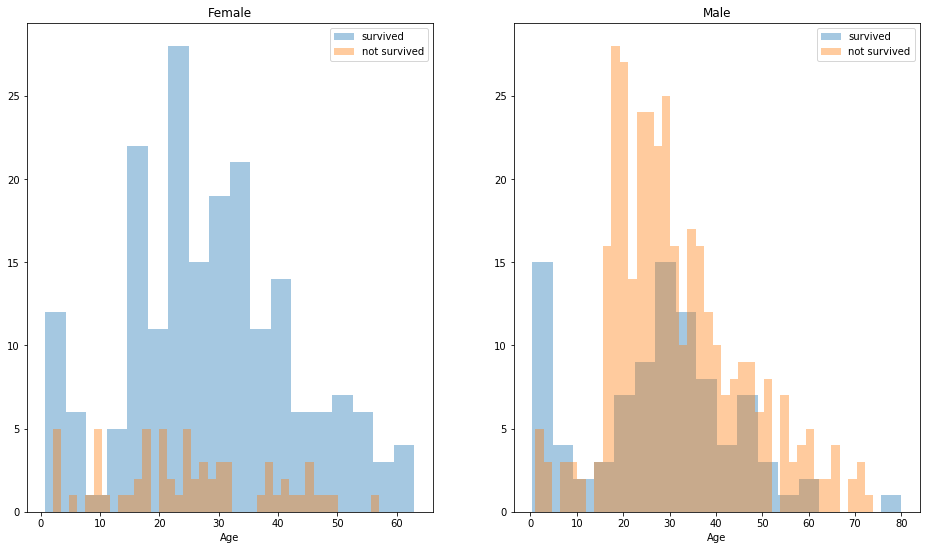

In [11]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 9))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sb.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sb.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sb.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sb.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [ ]:
#We can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

C:\Users\Parth Samal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


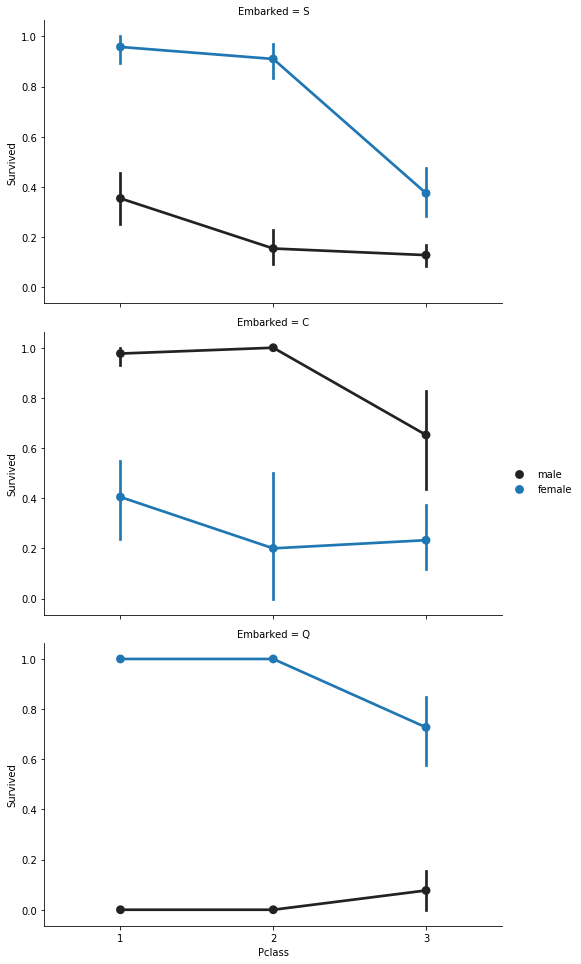

In [12]:
#Embarked, Pclass and Sex:
FacetGrid = sb.FacetGrid(titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [ ]:
#Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. 
#Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

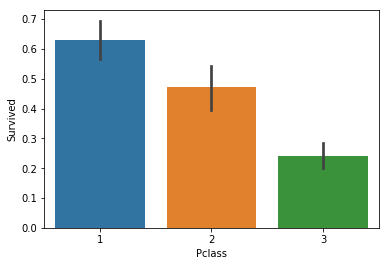

In [13]:
#Pclass:
sb.barplot(x='Pclass', y='Survived', data=titanic)

In [ ]:
#Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

C:\Users\Parth Samal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


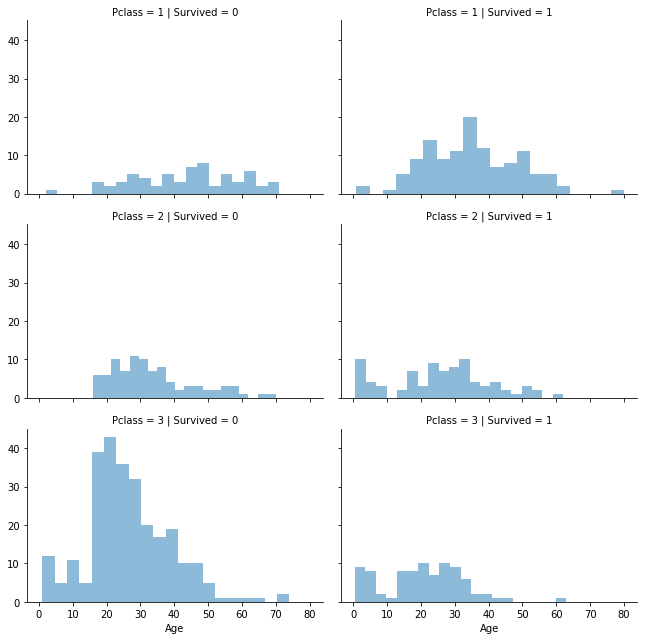

In [14]:
grid = sb.FacetGrid(titanic, col='Survived', row='Pclass', size=3, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

### Data Preprocessing on missing values

In [15]:
#Cabin
titanic_new = titanic

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

titanic_new['Cabin'] = titanic_new['Cabin'].fillna("U0")
titanic_new['Deck'] = titanic_new['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
titanic_new['Deck'] = titanic_new['Deck'].map(deck)
titanic_new['Deck'] = titanic_new['Deck'].fillna(0)
titanic_new['Deck'] = titanic_new['Deck'].astype(int)

#I will now drop the cabin feature
titanic_new = titanic_new.drop(['Cabin'], axis=1)

In [16]:
#Age
mean = titanic_new["Age"].mean()
std = titanic_new["Age"].std()
is_null = titanic_new["Age"].isnull().sum()

#Computing random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

#Filling NaN values in Age column with random values generated
age_slice = titanic_new["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic_new["Age"] = age_slice
titanic_new["Age"] = titanic_new["Age"].astype(int)

In [17]:

titanic_new["Age"].isnull().sum() #Check for any null in the Age column.

0

In [18]:
#Embarked
titanic_new['Embarked'].describe()  #The summary statistics of the Embarked column

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
common_value = 'S' #By Observing the Embarked column
titanic_new['Embarked'] = titanic_new['Embarked'].fillna(common_value)

In [20]:
titanic_new.info() #Prints information about titanic_new DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Deck           891 non-null int32
dtypes: float64(1), int32(2), int64(5), object(4)
memory usage: 76.6+ KB


In [21]:
titanic_new.isnull().values.any() #Check for any NA’s in the dataframe.

False

In [22]:
#Label Encoding Sex and Fare
genders = {"male": 1, "female": 0}
titanic_new['Sex'] = titanic_new['Sex'].map(genders)

In [23]:
titanic_new['Fare'] = titanic_new['Fare'].fillna(0)
titanic_new['Fare'] = titanic_new['Fare'].astype(int)

In [24]:
titanic_new.head() #new dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,S,8


In [25]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int32
Embarked       891 non-null object
Deck           891 non-null int32
dtypes: int32(3), int64(6), object(3)
memory usage: 73.2+ KB


### Train, Test & Split

In [26]:
X = titanic_new[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']] 
y = titanic_new['Survived']

In [27]:
#Spliting data randomly into 80% training and 20% test
from sklearn import tree, metrics, model_selection, preprocessing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

### Creating and Training the Model

In [28]:
#Training the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Prediction

In [29]:
y_pred = dtree.predict(X_test)

In [31]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

### How did created model perform?

In [32]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 32
Accuracy: 0.82


### Cross Val Score from accuracy validation

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator= dtree, #Model to test
                X = X,  
                y = y,                #Target variable
                scoring = "accuracy", #Scoring metric    
                cv=10)                #Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[0.82222222 0.82222222 0.78651685 0.84269663 0.82022472 0.78651685
 0.79775281 0.78651685 0.85393258 0.80681818]
Average accuracy:  0.8125419929633415
